In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

<h1>Task 1: Distribution of Birth Rates </h1>

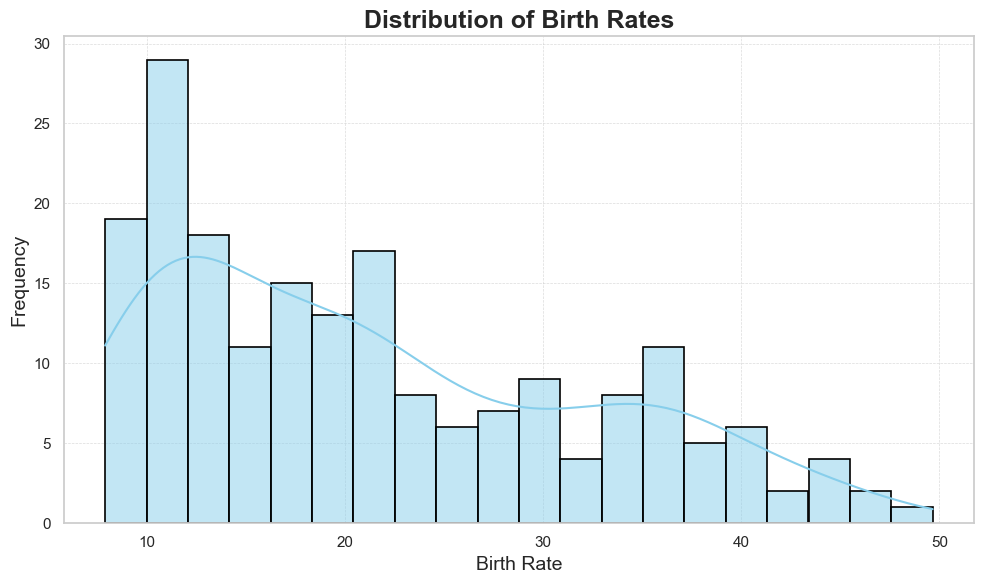

In [18]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.histplot(
    internet['Birth rate'], 
    bins=20, 
    kde=True, 
    color="skyblue", 
    edgecolor="black", 
    linewidth=1.2
)
plt.title("Distribution of Birth Rates", fontsize=18, fontweight='bold')
plt.xlabel("Birth Rate", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


<h3>Insight: The histogram visually illustrates the distribution of birth rates, making it easier to spot central trends and detect potential outliers.</h3>

<h1>Task 2: Top 5 Countries with Highest Internet Usage </h1>

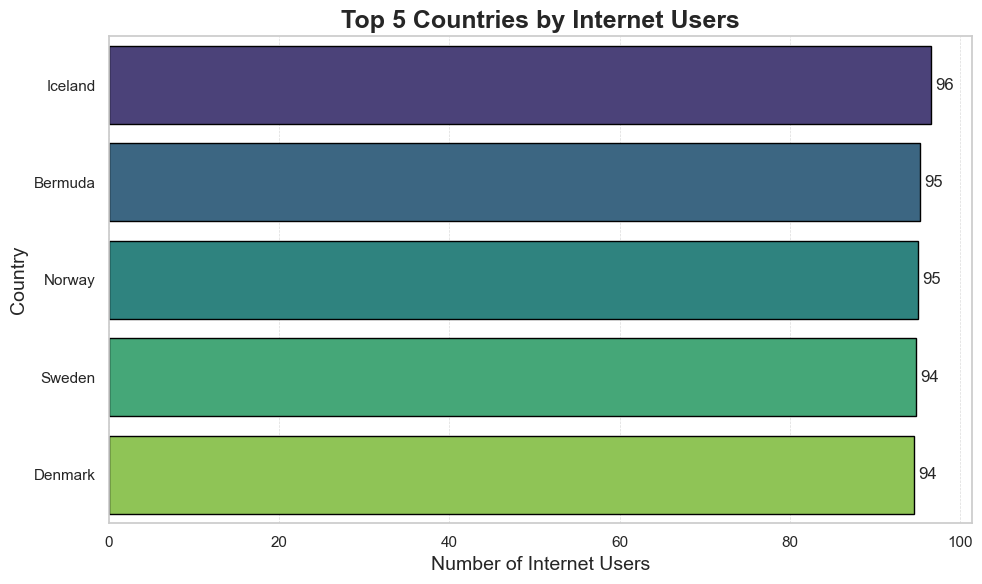

In [21]:
top_5_internet = internet.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Internet users', 
    y='Country Name', 
    data=top_5_internet, 
    palette="viridis",
    edgecolor="black"
)

plt.title("Top 5 Countries by Internet Users", fontsize=18, fontweight='bold')
plt.xlabel("Number of Internet Users", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

for index, value in enumerate(top_5_internet['Internet users']):
    plt.text(value + 0.5, index, f"{int(value):,}", va='center', fontsize=12)

plt.tight_layout()
plt.show()

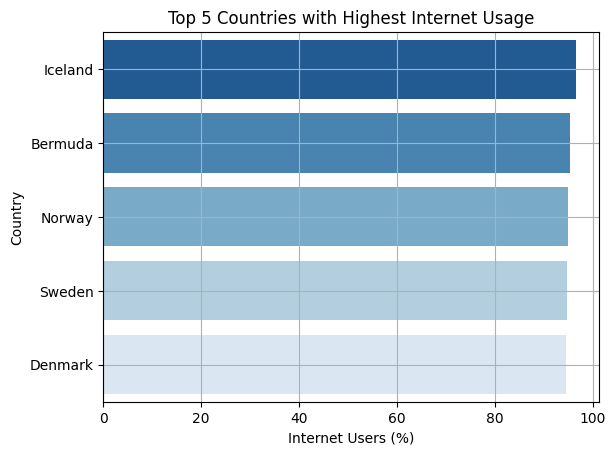

In [7]:
#barplot
sns.barplot(x='Internet users', y='Country Name', data=top_5_internet, palette="Blues_r")

plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.title("Top 5 Countries with Highest Internet Usage")
plt.grid()
plt.show()

<h3>Insight: Identifying the top internet-using countries highlights global digital trends and potential disparities in internet accessibility.</h3>

<h1>Task 3: Count of Countries by Income Group </h1>

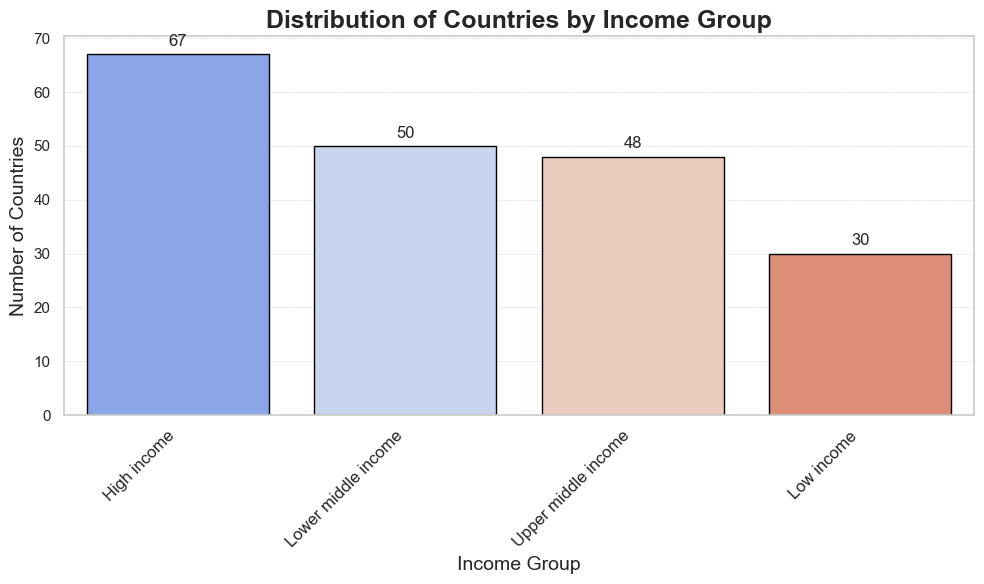

In [25]:
income_counts = internet['Income Group'].value_counts()

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 6))
sns.barplot(
    x=income_counts.index,
    y=income_counts.values,
    palette="coolwarm",
    edgecolor="black"
)

plt.title("Distribution of Countries by Income Group", fontsize=18, fontweight='bold')
plt.xlabel("Income Group", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

for index, value in enumerate(income_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

<h3Insight: Grouping countries by income levels provides valuable insight into economic diversity and helps reveal potential correlations with other key factors.</h3>

<h1>Task 4: Box Plot of Internet Usage (Optional) </h1>

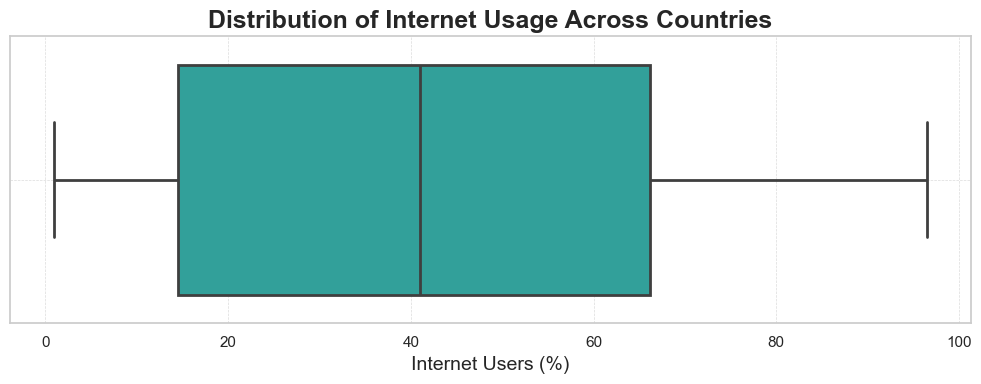

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))
sns.boxplot(
    x=internet['Internet users'],
    color='lightseagreen',
    linewidth=2,
    fliersize=5  
)

plt.title("Distribution of Internet Usage Across Countries", fontsize=18, fontweight='bold')
plt.xlabel("Internet Users (%)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight: The box plot offers a concise overview of internet usage distribution, clearly showcasing the median, quartiles, and any potential outliers.</h3>

<h1>Task 5: Countries with No Internet Access </h1>

In [29]:
no_internet = internet[internet['Internet users'] == 0][['Country Name']]

if no_internet.empty:
    print("✅ No countries found with 0% internet access.")
else:
    print("🌐 Countries with No Internet Access:")
    display(no_internet)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=no_internet['Country Name'], 
        y=[1]*len(no_internet),  
        color="tomato", 
        edgecolor="black"
    )

    plt.title("Countries with No Internet Access", fontsize=18, fontweight='bold')
    plt.ylabel("") 
    plt.xlabel("Country Name", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks([]) 
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

✅ No countries found with 0% internet access.


<h3>Insight: Highlighting countries without internet access reveals global connectivity gaps and emphasizes regions that require technological advancement.</h3>

<h1>Task 6: Average Birth Rate</h1>

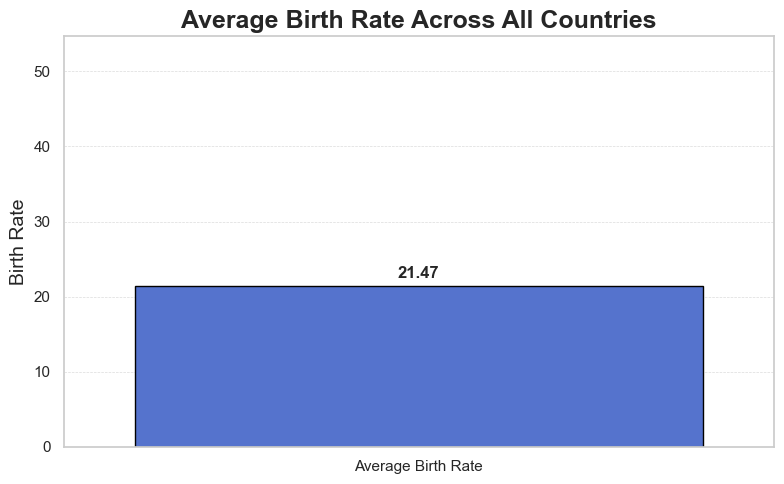

In [32]:
average_birth_rate = internet['Birth rate'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Average Birth Rate"], 
    y=[average_birth_rate], 
    color="royalblue", 
    edgecolor="black"
)
plt.title("Average Birth Rate Across All Countries", fontsize=18, fontweight='bold')
plt.ylabel("Birth Rate", fontsize=14)
plt.xlabel("") 
plt.ylim(0, internet['Birth rate'].max() + 5)
plt.text(0, average_birth_rate + 1, f"{average_birth_rate:.2f}", ha='center', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight: The average birth rate offers valuable insight into global fertility patterns and serves as a key metric for demographic planning.</h3>

<h1>Task 7: Scatter Plot - Birth Rate vs Internet Usage</h1>

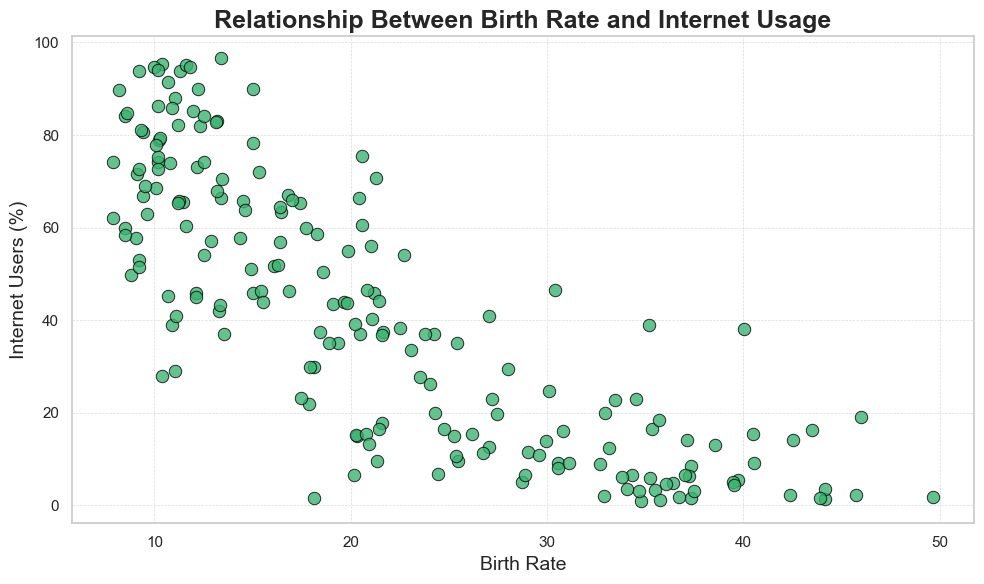

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=internet['Birth rate'], 
    y=internet['Internet users'],
    color="mediumseagreen", 
    edgecolor="black", 
    s=80,   
    alpha=0.8 
)

plt.title("Relationship Between Birth Rate and Internet Usage", fontsize=18, fontweight='bold')
plt.xlabel("Birth Rate", fontsize=14)
plt.ylabel("Internet Users (%)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight: This scatter plot highlights possible relationships between internet usage and birth rates, offering a glimpse into underlying socioeconomic patterns.</h3>

<h1>Task 8: Countries with Birth Rates Above 40</h1>

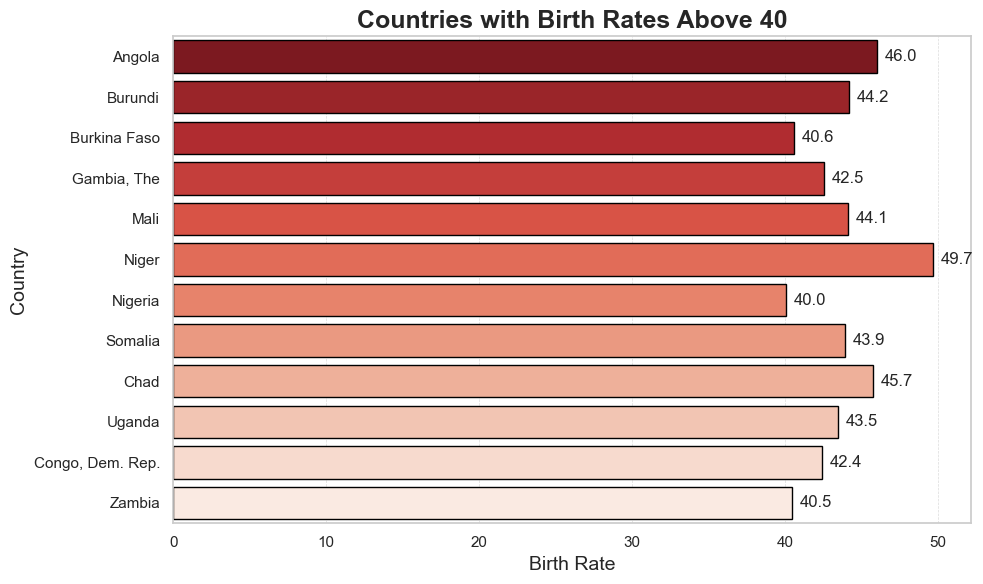

In [35]:
high_birth_rate = internet[internet['Birth rate'] > 40][['Country Name', 'Birth rate']]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    y=high_birth_rate['Country Name'],
    x=high_birth_rate['Birth rate'],
    palette="Reds_r",
    edgecolor="black"
    )
plt.title("Countries with Birth Rates Above 40", fontsize=18, fontweight='bold')
plt.xlabel("Birth Rate", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)


for index, value in enumerate(high_birth_rate['Birth rate']):
    plt.text(value + 0.5, index, f"{value:.1f}", va='center', fontsize=12)


plt.tight_layout()
plt.show()

<h3>Insight: Highlighting countries with high birth rates provides valuable insight into population growth patterns and informs potential policy decisions.</h3>

<h1>Task 9: Pie Chart of Income Groups</h1>

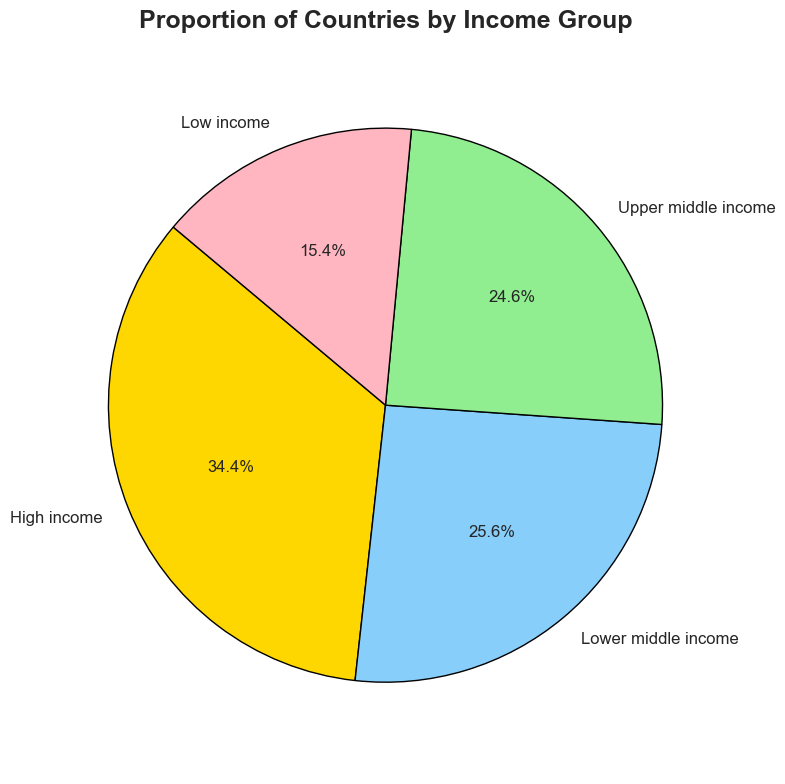

In [36]:
income_counts = internet['Income Group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    income_counts, 
    labels=income_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FFD700', '#87CEFA', '#90EE90', '#FFB6C1'],  # gold, light blue, light green, pink
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title("Proportion of Countries by Income Group", fontsize=18, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

<h3>Insight: The pie chart illustrates the distribution of countries across different income groups, providing a clear perspective on global economic diversity.</h3>

<h1>Task 10: Correlation Between Birth Rate and Internet Usage</h1>

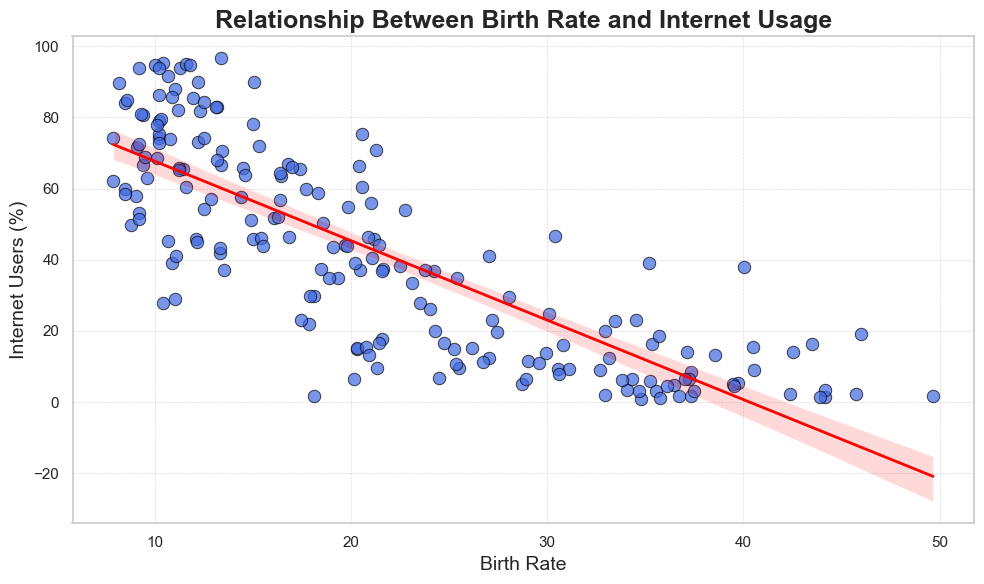

In [37]:
correlation = internet[['Birth rate', 'Internet users']].corr().iloc[0, 1]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=internet['Birth rate'], 
    y=internet['Internet users'],
    color='royalblue',
    edgecolor='black',
    alpha=0.7,
    s=80  # Size of points
)
sns.regplot(
    x=internet['Birth rate'],
    y=internet['Internet users'],
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
plt.title("Relationship Between Birth Rate and Internet Usage", fontsize=18, fontweight='bold')
plt.xlabel("Birth Rate", fontsize=14)
plt.ylabel("Internet Users (%)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight: Exploring the correlation between birth rate and internet usage uncovers potential socioeconomic connections and trends.</h3>